In [169]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [170]:
%run _libraries.ipynb

In [171]:
%run _functions.ipynb

In [172]:
save_files = 'files/'

In [173]:
save_img = 'docs/img/'

In [174]:
session_name = 'research'

# Section II. Models

## Load Saved Section if exists

## Load Data

In [175]:
train = datasets_dict = loadit(
    'train', dir=save_files)

In [176]:
valid = datasets_dict = loadit(
    'valid', dir=save_files)

In [177]:
test = datasets_dict = loadit(
    'test', dir=save_files)

## Preprocessing

### Features selection

In [178]:
train.head()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,...,is_Friday,is_Sunday,target1_diff,target1_returns,target1_volatility,p,is_31,target1_cum_avg,target1_by_weekday,target1_by_minutes
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,0,...,0,1,NaN,NaN,NaN,NaN,0,NaN,30649.323725,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,10,0,...,0,1,-4241.01266,-12.453167,155.081364,-0.124532,0,34055.696200,30649.323725,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,20,0,...,0,1,-686.58227,-2.302833,5.303038,-0.023028,0,31935.189870,30649.323725,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,30,0,...,0,1,-899.24051,-3.087192,9.530757,-0.030872,0,30999.493670,30649.323725,NaN
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,40,0,...,0,1,-893.16456,-3.164012,10.010972,-0.031640,0,30306.835442,30649.323725,NaN


In [179]:
print(train.columns.tolist())

['temperature', 'humidity', 'windspeed', 'generaldiffuseflows', 'diffuseflows', 'target1', 'target2', 'target3', 'minute', 'hour', 'day', 'day_number', 'day_of_year', 'weekday', 'week', 'month', 'year_month', 'year_day', 'count_elmnts_by_day', 'is_Friday', 'is_Sunday', 'target1_diff', 'target1_returns', 'target1_volatility', 'p', 'is_31', 'target1_cum_avg', 'target1_by_weekday', 'target1_by_minutes']


In [180]:
# example of correlation coefficients
(train
 .loc['2017-05-05', ~train.columns.isin(['year_month', 'year_day'])]
 .corr()['target1']
 .sort_values(key=abs, ascending=False)[1:])

target1_by_minutes     0.974348
target2                0.951248
target3                0.881336
hour                   0.808884
count_elmnts_by_day    0.808425
target1_cum_avg        0.703969
humidity              -0.662634
windspeed              0.619790
temperature            0.592302
generaldiffuseflows    0.206003
target1_volatility     0.052608
target1_diff           0.049179
target1_returns        0.048800
p                      0.048800
diffuseflows          -0.014995
minute                 0.005437
day                         NaN
day_number                  NaN
day_of_year                 NaN
weekday                     NaN
week                        NaN
month                       NaN
is_Friday                   NaN
is_Sunday                   NaN
is_31                       NaN
target1_by_weekday          NaN
Name: target1, dtype: float64

In [181]:
train[['target1', 'target1_by_weekday']].corr()

,target1,target1_by_weekday
target1,1.000000,0.097975
target1_by_weekday,0.097975,1.000000


## X, y

In [182]:
y = train['target1'].copy()

In [183]:
y = y[4464:].copy()

In [184]:
y

2017-02-01 00:00:00    29892.20339
2017-02-01 00:10:00    29086.77966
2017-02-01 00:20:00    28244.74576
2017-02-01 00:30:00    27793.22034
2017-02-01 00:40:00    27286.77966
                          ...     
2017-07-31 23:10:00    43407.30897
2017-07-31 23:20:00    42507.90698
2017-07-31 23:30:00    41659.53488
2017-07-31 23:40:00    40843.05648
2017-07-31 23:50:00    39631.09635
Freq: 10min, Name: target1, Length: 26064, dtype: float64

In [185]:
X = train.iloc[4464:, :].copy()

In [186]:
X = X['target1_by_minutes'].copy()

In [187]:
X

2017-02-01 00:00:00    34055.69620
2017-02-01 00:10:00    29814.68354
2017-02-01 00:20:00    29128.10127
2017-02-01 00:30:00    28228.86076
2017-02-01 00:40:00    27335.69620
                          ...     
2017-07-31 23:10:00    40205.56291
2017-07-31 23:20:00    39423.57616
2017-07-31 23:30:00    38883.17881
2017-07-31 23:40:00    38107.54967
2017-07-31 23:50:00    37312.84768
Freq: 10min, Name: target1_by_minutes, Length: 26064, dtype: float64

In [188]:
train.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:40:00', '2017-01-01 00:50:00',
               '2017-01-01 01:00:00', '2017-01-01 01:10:00',
               '2017-01-01 01:20:00', '2017-01-01 01:30:00',
               ...
               '2017-07-31 22:20:00', '2017-07-31 22:30:00',
               '2017-07-31 22:40:00', '2017-07-31 22:50:00',
               '2017-07-31 23:00:00', '2017-07-31 23:10:00',
               '2017-07-31 23:20:00', '2017-07-31 23:30:00',
               '2017-07-31 23:40:00', '2017-07-31 23:50:00'],
              dtype='datetime64[ns]', length=30528, freq='10min')

## Model 1: ARMA

Best model: ARIMA(2, 1, 2)

In [189]:
arma101 = ARIMA(y, order=(1,0,1)).fit()

arima111 = ARIMA(y, order=(1,1,1)).fit()
arima211 = ARIMA(y, order=(2,1,1)).fit()
arima311 = ARIMA(y, order=(3,1,1)).fit()
arima411 = ARIMA(y, order=(4,1,1)).fit()

arima112 = ARIMA(y, order=(1,1,2)).fit()
arima113 = ARIMA(y, order=(1,1,3)).fit()
arima114 = ARIMA(y, order=(1,1,4)).fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [190]:
arima_results = pd.DataFrame(
    data=[
        [arma101.llf, arma101.aic],
        [arima111.llf, arima111.aic],
        [arima211.llf, arima211.aic],
        [arima311.llf, arima311.aic],
        [arima411.llf, arima411.aic],
        [arima112.llf, arima112.aic],
        [arima113.llf, arima113.aic],
        [arima114.llf, arima114.aic],
    ],
    columns=['LLF', 'AIC'],
    index=[
        'arma101', 'arima111', 'arima211', 'arima311',
        'arima411', 'arima112', 'arima113', 'arima114'
    ]
)

In [191]:
arima_results.sort_values('AIC')

,LLF,AIC
arima311,-197660.151491,395330.302983
arima114,-197659.536814,395331.073627
arima411,-197659.889502,395331.779003
arima112,-197662.429198,395332.858397
arima113,-197662.248854,395334.497708
arima211,-197711.129976,395430.259952
arima111,-197862.867370,395731.734739
arma101,-200673.649239,401355.298478


In [192]:
arima_results.sort_values('LLF', ascending=False)

,LLF,AIC
arima114,-197659.536814,395331.073627
arima411,-197659.889502,395331.779003
arima311,-197660.151491,395330.302983
arima113,-197662.248854,395334.497708
arima112,-197662.429198,395332.858397
arima211,-197711.129976,395430.259952
arima111,-197862.867370,395731.734739
arma101,-200673.649239,401355.298478


In [193]:
test_LLR(arima114, arima311)

p-value: 1.0


In [194]:
test_LLR(arima311, arima114)

p-value: 0.268


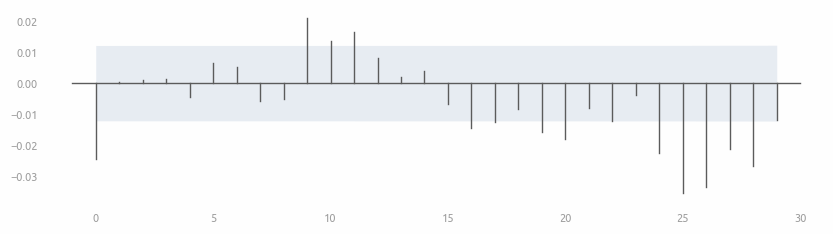

In [195]:
plot_acf(ts_acf_calculate(arima311.resid, lags=30))

In [196]:
print(arima311.summary())

                               SARIMAX Results                                
Dep. Variable:                target1   No. Observations:                26064
Model:                 ARIMA(3, 1, 1)   Log Likelihood             -197660.151
Date:                Sun, 17 Mar 2024   AIC                         395330.303
Time:                        17:57:16   BIC                         395371.144
Sample:                    02-01-2017   HQIC                        395343.496
                         - 07-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0253      0.022     45.696      0.000       0.981       1.069
ar.L2         -0.2462      0.013    -18.606      0.000      -0.272      -0.220
ar.L3          0.0891      0.003     30.836      0.0

In [197]:
arima_best = arima311

## Model 2: SARIMAX

In [ ]:
sarimax = SARIMAX(
    y, exog=X,
    order=(1,1,1),
    seasonal_order=(3,1,1,24)
).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.80532D+00    |proj g|=  1.79188D-01

At iterate    5    f=  7.75700D+00    |proj g|=  8.86155D-02

At iterate   10    f=  7.71864D+00    |proj g|=  1.47452D-02

At iterate   15    f=  7.71169D+00    |proj g|=  6.41612D-03

At iterate   20    f=  7.70515D+00    |proj g|=  2.59391D-03

At iterate   25    f=  7.70479D+00    |proj g|=  8.03617D-04

At iterate   30    f=  7.70419D+00    |proj g|=  1.04420D-02

At iterate   35    f=  7.63633D+00    |proj g|=  1.66529D-01

At iterate   40    f=  7.60853D+00    |proj g|=  5.26195D-03


In [ ]:
print(sarimax.summary())

## Model 1: SARIMAX

In [15]:
from pmdarima.arima import auto_arima

In [17]:
train.columns

Index(['temperature', 'humidity', 'windspeed', 'generaldiffuseflows',
       'diffuseflows', 'target1', 'target2', 'target3', 'minute', 'hour',
       'day', 'day_number', 'day_of_year', 'weekday', 'week', 'month',
       'year_month', 'year_day', 'count_elmnts_by_day', 'is_Friday',
       'is_Sunday', 'target1_diff', 'target1_returns', 'target1_volatility',
       'p', 'is_31', 'target1_cum_avg', 'target1_by_weekday'],
      dtype='object')

In [26]:
train_ = train[[
    'temperature', 'minute', 'hour', 'day', 'weekday',
    'is_Friday', 'is_Sunday', 'is_31', 'target1_cum_avg', 'target1_by_weekday', 'target1']].copy()

In [70]:
y = train_['target1'].copy()

In [71]:
y.shape

(17568,)

In [72]:
X = train_.iloc[:, :-1].copy()

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17568 entries, 2017-04-01 00:00:00 to 2017-07-31 23:50:00
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         17568 non-null  float64
 1   minute              17568 non-null  int32  
 2   hour                17568 non-null  int32  
 3   day                 17568 non-null  int32  
 4   weekday             17568 non-null  int32  
 5   is_Friday           17568 non-null  int64  
 6   is_Sunday           17568 non-null  int64  
 7   is_31               17568 non-null  int64  
 8   target1_cum_avg     17568 non-null  float64
 9   target1_by_weekday  17568 non-null  float64
dtypes: float64(3), int32(4), int64(3)
memory usage: 1.2 MB


In [74]:
X_ = np.asarray(X)

In [75]:
X_.shape

(17568, 10)

In [80]:
st = stopwatch.start()
model_auto = auto_arima(y)
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:01:41


In [81]:
model_auto

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### Save Session

In [135]:
save_session(session_name)

### Execution time

In [113]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:01:17
